## This notebook is to explain how to use the project package correctly

### Importing libraries

In [40]:
from PIL import Image
import json
import pandas as pd

### Making sure we run the package installation from the project root directory

In [2]:
%pwd

'/home/repos/energy-forecasting/notebooks'

In [3]:
%cd ..

/home/repos/energy-forecasting


/root/miniconda3/envs/ts/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
%pwd

'/home/repos/energy-forecasting'

In [6]:
%pip install .

Obtaining file:///home/repos/energy-forecasting
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for energy-forecasting (pyproject.toml) ... done
  Created wheel for energy-forecasting: filename=energy_forecasting-0.0.0-0.editable-py3-none-any.whl size=4817 sha256=73be93a0a51b38d68164f5431158296c37ab966659c68d16a6a186e7cf927147
  Stored in directory: /tmp/pip-ephem-wheel-cache-10yde465/wheels/a8/9a/47/3d2995ad363a7889249121f3563b744a8a1ffa1179e78187a5
Successfully built energy-forecasting
  Attempting uninstall: energy-forecasting
    Found existing installation: energy-forecasting 0.0.0
    Uninstalling energy-forecasting-0.0.0:
      Successfully uninstalled energy-forecasting-0.0.0
Note: you may need to restart the kernel to use updated packages.


### Running the training pipeline

In [7]:
!energy_forecasting pipeline=train train_params=rf

[2024-02-27 21:18:52,802][train_pipeline][INFO] - Start train pipeline with params path_config:
  input_data_path: data/raw/PJMW_hourly.csv
  output_model_path: models/model_
  cross_val_scores: models/cross_val_scores.json
  opt_results: models/opt_results.json
splitting_params:
  n_splits: 5
  hours: 24
  days: 365
  years: 1
  gap: 24
feature_params:
  datetime_col: Datetime
  target_col: PJMW_MW
train_params:
  model_type: RandomForestRegressor
  n_estimators: 10
  max_depth: 5
  random_state: 21
  verbose: 1

[2024-02-27 21:18:52,802][train_pipeline][INFO] - Model is RandomForestRegressor
[2024-02-27 21:18:52,863][train_pipeline][INFO] - Building features...
[2024-02-27 21:18:53,388][train_pipeline][INFO] - Splitting data into train and test...
[2024-02-27 21:18:53,394][train_pipeline][INFO] - Model initialization...
[2024-02-27 21:18:53,394][train_pipeline][INFO] - Running cross validation...
Mean RMSE accross folds is:  480640.8028376338
RMSE Standard deviation accross folds is:

Now let's see the pipeline outputs, since we save them in a corresponding file.

In [27]:
f = open("models/cross_val_scores.json")
training_results_dict = json.load(f)
training_results_df = pd.DataFrame(training_results_dict)
training_results_df.tail()


,mean_rmse_folds,model_params,model_type,n_folds,scores,std_folds,timestamp
11,480640.802838,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",RandomForestRegressor,5,"[469615.92838419037, 499114.1440345615, 487043...",12078.951642,2024-02-27 21:08:58
12,461687.549307,"{'copy_X': True, 'fit_intercept': True, 'n_job...",LinearRegression,5,"[450066.6373005836, 429351.99090818845, 465119...",44133.997639,2024-02-27 21:09:11
13,464567.692486,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",MLPRegressor,5,"[477899.562539529, 534372.1215973784, 399497.5...",53832.545101,2024-02-27 21:09:34
14,480640.802838,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",RandomForestRegressor,5,"[469615.92838419037, 499114.1440345615, 487043...",12078.951642,2024-02-27 21:15:54
15,480640.802838,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",RandomForestRegressor,5,"[469615.92838419037, 499114.1440345615, 487043...",12078.951642,2024-02-27 21:18:58


### Running the optimizer pipeline

In [28]:
!energy_forecasting pipeline=optimize optimizer_params=rf

[2024-02-27 21:39:35,543][optimizer_pipeline][INFO] - Start optimizer pipeline with params path_config:
  input_data_path: data/raw/PJMW_hourly.csv
  output_model_path: models/model_
  cross_val_scores: models/cross_val_scores.json
  opt_results: models/opt_results.json
splitting_params:
  n_splits: 5
  hours: 24
  days: 365
  years: 1
  gap: 24
feature_params:
  datetime_col: Datetime
  target_col: PJMW_MW
optimizer_params:
  model_type: RandomForestRegressor
  n_estimators: 10
  max_depth_from: 5
  max_depth_to: 20
  random_state: 21
  verbose: 1

[2024-02-27 21:39:35,544][optimizer_pipeline][INFO] - Model is RandomForestRegressor
[2024-02-27 21:39:35,594][optimizer_pipeline][INFO] - Building features...
[2024-02-27 21:39:36,096][optimizer_pipeline][INFO] - Splitting data into train and test...
[2024-02-27 21:39:36,103][optimizer_pipeline][INFO] - Model initialization...
[2024-02-27 21:39:36,103][optimizer_pipeline][INFO] - Model optimization...
  0%|                                 

And let's again see the results of the model optimization.

In [29]:
f = open("models/opt_results.json")
optimizer_results_dict = json.load(f)
optimizer_results_df = pd.DataFrame(optimizer_results_dict)
optimizer_results_df.tail()

,model_params,model_type,timestamp,tuned_params
0,"{'max_depth': 5, 'max_depth_from': 5, 'max_dep...",RandomForestRegressor,2024-02-26 03:51:16,{'max_depth': 17.0}
1,"{'max_depth': 5, 'max_depth_from': 5, 'max_dep...",RandomForestRegressor,2024-02-27 21:11:25,{'max_depth': 18.0}
2,"{'max_depth': 5, 'max_depth_from': 5, 'max_dep...",RandomForestRegressor,2024-02-27 21:41:20,{'max_depth': 19.0}


### Running the prediction pipeline

In [31]:
!energy_forecasting pipeline=predict

[2024-02-27 21:44:46,400][ml_project/predict_pipeline][INFO] - Start prediction pipeline
[2024-02-27 21:44:46,454][ml_project/predict_pipeline][INFO] - Dataset shape is (143206, 2)
[2024-02-27 21:44:46,455][ml_project/predict_pipeline][INFO] - Loading model...
[2024-02-27 21:44:46,455][ml_project/predict_pipeline][INFO] - Creating future df and concating it with an existing...
[2024-02-27 21:44:46,485][ml_project/predict_pipeline][INFO] - Building features...
[2024-02-27 21:44:47,056][ml_project/predict_pipeline][INFO] - Start prediction
[2024-02-27 21:44:47,097][ml_project/predict_pipeline][INFO] - Prediction is done and saved to the file data/produced/predictions.csv
[2024-02-27 21:44:47,098][ml_project/predict_pipeline][INFO] - Saving predictions plot


For prediction pipeline there is no option to specify the model directly. This is done to allow a user to use its own models in case of need. The use of a specific model is defined in predict_params.yaml, where a user can specify the path to the model.

An artifact of the prediction pipeline are predictions file and a prediction plot. Let's look at them. Reminding you that the pipeline makes predictions into one year into the future. This can be changed in predict_model.py module and in future can be one of the pipeline arguments.

In [34]:
predictions_df = pd.read_csv("data/produced/predictions.csv")
predictions_df.head()

,Datetime,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,pred
0,2018-08-03 00:00:00,0,4,3,8,2018,215,3,31,5713.0,5620.0,4772.0,5545.162303
1,2018-08-03 01:00:00,1,4,3,8,2018,215,3,31,5260.0,5226.0,4421.0,4862.644975
2,2018-08-03 02:00:00,2,4,3,8,2018,215,3,31,4965.0,4913.0,4184.0,4862.644975
3,2018-08-03 03:00:00,3,4,3,8,2018,215,3,31,4815.0,4677.0,4085.0,4862.644975
4,2018-08-03 04:00:00,4,4,3,8,2018,215,3,31,4620.0,4638.0,4031.0,4730.238836


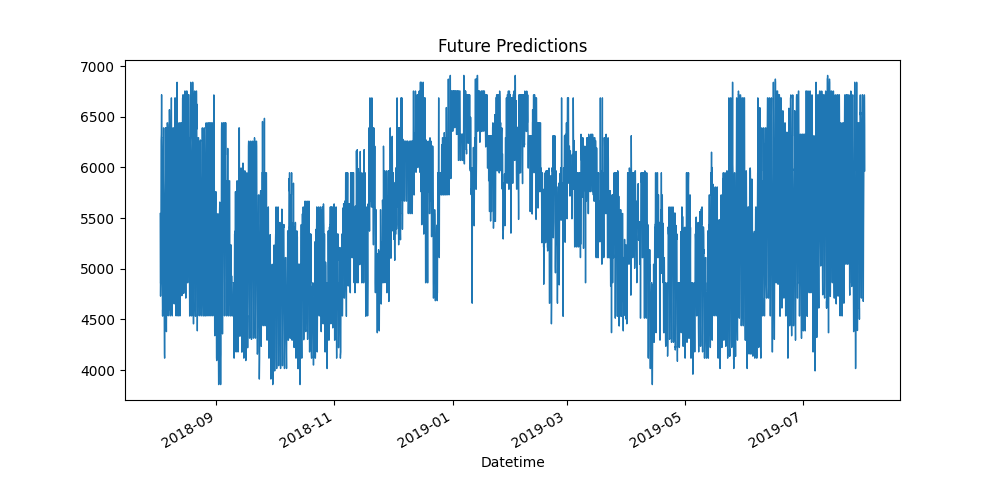

In [41]:
img = Image.open("data/produced/predictions_plot.png")
img.show()